In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load data

In [2]:
df_12CO2 = pd.read_excel('./isotopologue_distribution_12C_CO2.xlsx')
df_13CO2 = pd.read_excel('./isotopologue_distribution_13C_CO2.xlsx')

# convert isotopologue numbers so that the highest isotopologue always first
df_12CO2_rearranged = df_12CO2.copy().sort_values('aa')
df_12CO2_rearranged.index = df_12CO2_rearranged['aa']
df_12CO2_rearranged.drop('aa',axis=1, inplace=True)
df_12CO2_rearranged['isotopologue'] = (df_12CO2_rearranged['isotopologue'] - df_12CO2_rearranged.groupby(df_12CO2_rearranged.index)['isotopologue'].max()).values

df_13CO2_rearranged = df_13CO2.copy().sort_values('aa')
df_13CO2_rearranged.index = df_13CO2_rearranged['aa']
df_13CO2_rearranged.drop('aa',axis=1, inplace=True)
df_13CO2_rearranged['isotopologue'] = (df_13CO2_rearranged['isotopologue'] - df_13CO2_rearranged.groupby(df_13CO2_rearranged.index)['isotopologue'].max()).values


# Plot isotopologue distributions as stacked bar chart

In [40]:
def plot_isotopologue_fraction(file_name, df, title, showlegend=False):
    # get amino acid names
    x = df.index.unique().tolist()
    
    # collect datapoints
    data = []
    colors = ["#2D2E83","#57589C","#8182B5","#ABABCD","#CFCFD7","#97878C", "#735658", "#5F3E40","#876E70","#4F4359", "#332D4E", "#171742"]
    bar_width = 0.75
    for i in range(df['isotopologue'].abs().max(), -1, -1):
        # iterate over all isotopologues
        fractional_labeling = df[df['isotopologue'] == -i]
        missing_aa = set(df.index).difference(set(fractional_labeling.index))
        fractional_labeling = fractional_labeling.append(pd.DataFrame(columns=['isotopologue fraction', 'std'], index=missing_aa, data=np.zeros((len(missing_aa), 2)))).sort_index()

        
        if i > 5:
            data.append(
                go.Bar(x=x, y=fractional_labeling['isotopologue fraction'], error_y={'array':fractional_labeling['std']}, 
                       showlegend=False, marker={'color':colors[i]},
                      width=bar_width
                      )
            )
        elif i == 0:
            data.append(go.Bar(x=x, y=fractional_labeling['isotopologue fraction'], error_y={'array':fractional_labeling['std']},
                               name='n', marker={'color':colors[i]},
                              width=bar_width)
                       )
        else:
            data.append(go.Bar(x=x, y=fractional_labeling['isotopologue fraction'], error_y={'array':fractional_labeling['std']},
                               name='n-{}'.format(i), marker={'color':colors[i]},
                              width=bar_width)
                       )
    
    # define layout
    layout = go.Layout(barmode='stack',
                       margin = {'l':0, 'r':0, 't':50, 'b':0},
                       height=250,
                       width=375,
                       paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                       font_family='Arial',
                       showlegend=showlegend,
                       legend = {'x': 1.05, 'y': 0.5, 'xanchor': 'left', 'yanchor': 'middle'},
                       font_size = 14,
                       title = {'text': title, 
                                'x':0.5, 'y': 1, 'xref': 'paper', 'yref': 'paper',
                               'xanchor': 'center','yanchor': 'bottom'},
                       yaxis = {'title': 'isotopologue fraction', 'dtick': 0.25, 'domain':[0.0, 0.95], 'range': [-0.08, 1.1]},
                       xaxis = {'tickangle': 90, },
                       autosize=False
                      )
    
    # define figure
    fig = go.Figure(data=data, layout=layout)
    
    if showlegend==True:
        # add annotations
        fig.add_annotation(text='number of labeled carbons', xref='paper', yref='paper', yanchor='middle', textangle=-90, x=1.1, y=0.5, showarrow=False,)
        fig.update_layout(showlegend=True)
    
    
    fig.show()
    fig.write_image('./{}_isotopologue_distribution.svg'.format(file_name))
    fig.write_image('./{}_isotopologue_distribution.pdf'.format(file_name))

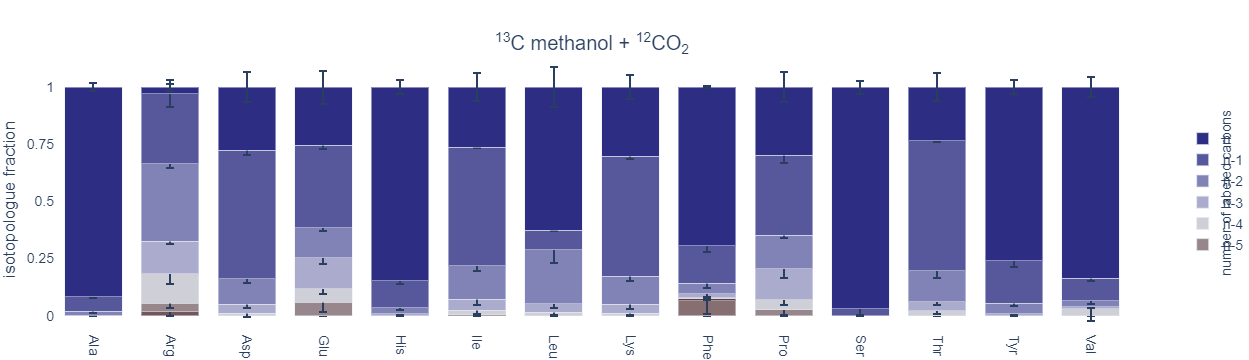

In [41]:
# plot 12CO2 data
plot_isotopologue_fraction('12CO2', df_12CO2_rearranged, '<sup>13</sup>C methanol + <sup>12</sup>CO<sub>2</sub>', True)

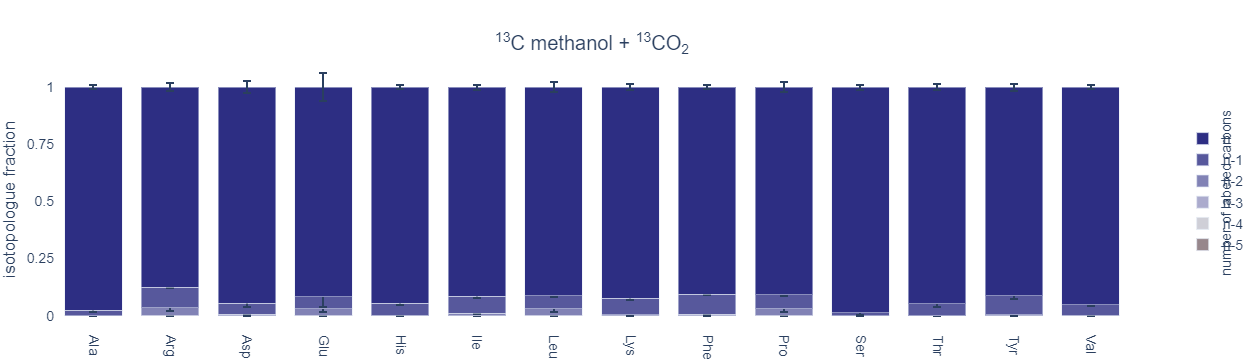

In [42]:
# plot 13CO2 data
plot_isotopologue_fraction('13CO2', df_13CO2_rearranged, '<sup>13</sup>C methanol + <sup>13</sup>CO<sub>2</sub>', True)